# Titanic challenge

## Import bibliotek

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Import danych przygotwanych w notebooku 'Data Manipulation'

In [2]:
df = pd.read_csv('train_dataframe.csv')
display(df)

PassengerId  Survived  Sex   Age  SibSp  Parch     Fare  Relatives  \
0              1       0.0    0  22.0      1      0   7.2500          1   
1              2       1.0    1  38.0      1      0  71.2833          1   
2              3       1.0    1  26.0      0      0   7.9250          0   
3              4       1.0    1  35.0      1      0  53.1000          1   
4              5       0.0    0  35.0      0      0   8.0500          0   
..           ...       ...  ...   ...    ...    ...      ...        ...   
886          887       0.0    0  27.0      0      0  13.0000          0   
887          888       1.0    1  19.0      0      0  30.0000          0   
888          889       0.0    1  24.0      1      2  23.4500          3   
889          890       1.0    0  26.0      0      0  30.0000          0   
890          891       0.0    0  32.0      0      0   7.7500          0   

     Pclass_1  Pclass_2  ...  AgeG_33-40  AgeG_40-65  AgeG_above_65  \
0       False     False  ...       False       False          False   
1        True     False  ...        True       False          False   
2       False     False  ...       False       False          False   
3        True     False  ...        True       False          False   
4       False     False  ...        True       False          False   
..        ...       ...  ...         ...         ...            ...   
886     False      True  ...       False       False          False   
887      True     False  ...       False       False          False   
888     False     False  ...       False       False          False   
889      True     False  ...       False       False          False   
890     False     False  ...       False       False          False   

     AgeG_below_11  FareG_100-300  FareG_14.454-31  FareG_31-100  \
0            False          False            False         False   
1            False          False            False          True   
2            False          False            False         False   
3            False          False            False          True   
4            False          False            False         False   
..             ...            ...              ...           ...   
886          False          False            False         False   
887          False          False             True         False   
888          False          False             True         False   
889          False          False             True         False   
890          False          False            False         False   

     FareG_7.91-14.454  FareG_above 300  FareG_below_7.91  
0                False            False              True  
1                False            False             False  
2                 True            False             False  
3                False            False             False  
4                 True            False             False  
..                 ...              ...               ...  
886               True            False             False  
887              False            False             False  
888              False            False             False  
889              False            False             False  
890              False            False              True  

[891 rows x 44 columns]

## Import bibliotek 2

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing  import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    PowerTransformer,
    QuantileTransformer,
    RobustScaler,
    StandardScaler
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import (
    GridSearchCV,
    ParameterGrid
)

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

In [4]:
features = list(df.columns)
features.remove('PassengerId')
features.remove('Survived')

features_clear = [f for f in features 
                 if 'Pclass' not in f 
                 and 'Title' not in f 
                 and 'Cabin' not in f 
                 and 'Embarked' not in f 
                 and 'Relatives' not in f 
                 and 'AgeG' not in f 
                 and 'FareG' not in f]

features_pclass = [f for f in features if 'Pclass' in f]
features_pclass = features_clear + features_pclass

features_title = [f for f in features if 'Title' in f]
features_title = features_clear + features_title

features_cabin = [f for f in features if 'Cabin' in f]
features_cabin = features_clear + features_cabin

features_embarked = [f for f in features if 'Embarked' in f]
features_embarked = features_clear + features_embarked

features_relatives = [f for f in features if 'Relatives' in f]
features_relatives = features_clear + features_relatives

features_age_g = [f for f in features if 'AgeG' in f]
features_age_g = features_clear + features_age_g

features_fare_g = [f for f in features if 'FareG' in f]
features_fare_g = features_clear + features_fare_g

features_list = [features_clear, features_pclass, features_title, features_cabin, features_embarked, features_relatives, features_age_g, features_fare_g]
for l in features_list:
    print(l)

['Sex', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3']
['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_Army', 'Title_Clerisy', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Nobility']
['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G', 'Cabin_T', 'Cabin_X']
['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Relatives']
['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'AgeG_11-18', 'AgeG_18-22', 'AgeG_22-26', 'AgeG_26-33', 'AgeG_33-40', 'AgeG_40-65', 'AgeG_above_65', 'AgeG_below_11']
['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FareG_100-300', 'FareG_14.454-31', 'FareG_31-100', 'FareG_7.91-14.454', 'FareG_above 300', 'FareG_below_7.91']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df['Survived'], test_size=0.2, random_state=42)
scaler = MinMaxScaler()
classifier = KNeighborsClassifier(n_neighbors=5)

In [6]:
kNeighborsClassifier = KNeighborsClassifier(n_neighbors=5)
sVC = SVC(
    kernel="linear",
    C=0.025,
    random_state=42
)
gaussianProcessClassifier = GaussianProcessClassifier(
    1.0 * RBF(1.0),
    random_state=42
)
decisionTreeClassifier = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)
randomForestClassifier = RandomForestClassifier(
    max_depth=5, 
    n_estimators=10, 
    max_features=1, 
    random_state=42
)
mLPClassifier = MLPClassifier(
    alpha=1, 
    max_iter=712, 
    random_state=42
)
adaBoostClassifier = AdaBoostClassifier(
    algorithm="SAMME", 
    random_state=42
)
gaussianNB = GaussianNB()
quadraticDiscriminantAnalysis = QuadraticDiscriminantAnalysis()

classifiers = [
    kNeighborsClassifier,
    sVC,
    gaussianProcessClassifier,
    decisionTreeClassifier,
    randomForestClassifier,
    mLPClassifier,
    adaBoostClassifier,
    gaussianNB,
    quadraticDiscriminantAnalysis
]

maxAbsScaler = MaxAbsScaler()
minMaxScaler = MinMaxScaler()
normalizer = Normalizer()
powerTransformer = PowerTransformer()
quantileTransformer = QuantileTransformer()
robustScaler = RobustScaler()
standardScaler = StandardScaler()

scalers = [maxAbsScaler, minMaxScaler, normalizer, powerTransformer, quantileTransformer, robustScaler, standardScaler]
score_dfs = []
for fea in features_list:
    X_train, X_test, y_train, y_test = train_test_split(df[fea], df['Survived'], test_size=0.2, random_state=42)
    score_df = pd.DataFrame()
    scaler_names = []
    for s in scalers:
        scaler_name = [name for name, value in globals().items() if value is s]
        scaler_names.append(scaler_name[0])
        
    for cl in classifiers:
        classifier_name = [name for name, value in globals().items() if value is cl]
        #print("\n", classifier_name[0], ":")
        classifier_score_list = []
        for s in scalers:
            s.fit(X_train)
            train_data = s.transform(X_train)
            cl.fit(train_data, y_train)
            
            test_data = s.transform(X_test)
            scaler_name = [name for name, value in globals().items() if value is s]
            accuracy = cl.score(test_data, y_test)
            #print(scaler_name[0], ": Accuracy:", accuracy)
            classifier_score_list.append(accuracy)
        
        score_df[classifier_name[0]] = classifier_score_list
        
    score_df.index = scaler_names
    
    display(score_df)
    score_dfs.append(score_df)

kNeighborsClassifier       sVC  \
maxAbsScaler                     0.765363  0.782123   
minMaxScaler                     0.765363  0.782123   
normalizer                       0.793296  0.586592   
powerTransformer                 0.765363  0.782123   
quantileTransformer              0.782123  0.782123   
robustScaler                     0.782123  0.782123   
standardScaler                   0.765363  0.782123   

                     gaussianProcessClassifier  decisionTreeClassifier  \
maxAbsScaler                          0.798883                0.810056   
minMaxScaler                          0.798883                0.810056   
normalizer                            0.821229                0.787709   
powerTransformer                      0.798883                0.810056   
quantileTransformer                   0.782123                0.810056   
robustScaler                          0.810056                0.810056   
standardScaler                        0.798883                0.810056   

                     randomForestClassifier  mLPClassifier  \
maxAbsScaler                       0.787709       0.782123   
minMaxScaler                       0.787709       0.782123   
normalizer                         0.821229       0.681564   
powerTransformer                   0.787709       0.787709   
quantileTransformer                0.787709       0.782123   
robustScaler                       0.787709       0.787709   
standardScaler                     0.787709       0.798883   

                     adaBoostClassifier  gaussianNB  \
maxAbsScaler                   0.793296    0.787709   
minMaxScaler                   0.793296    0.787709   
normalizer                     0.798883    0.765363   
powerTransformer               0.793296    0.770950   
quantileTransformer            0.793296    0.754190   
robustScaler                   0.793296    0.787709   
standardScaler                 0.793296    0.787709   

                     quadraticDiscriminantAnalysis  
maxAbsScaler                              0.793296  
minMaxScaler                              0.793296  
normalizer                                0.765363  
powerTransformer                          0.787709  
quantileTransformer                       0.793296  
robustScaler                              0.793296  
standardScaler                            0.793296

kNeighborsClassifier       sVC  \
maxAbsScaler                     0.787709  0.782123   
minMaxScaler                     0.787709  0.782123   
normalizer                       0.776536  0.586592   
powerTransformer                 0.810056  0.782123   
quantileTransformer              0.776536  0.782123   
robustScaler                     0.804469  0.782123   
standardScaler                   0.793296  0.782123   

                     gaussianProcessClassifier  decisionTreeClassifier  \
maxAbsScaler                          0.821229                0.804469   
minMaxScaler                          0.821229                0.804469   
normalizer                            0.815642                0.804469   
powerTransformer                      0.826816                0.804469   
quantileTransformer                   0.815642                0.804469   
robustScaler                          0.821229                0.804469   
standardScaler                        0.832402                0.804469   

                     randomForestClassifier  mLPClassifier  \
maxAbsScaler                       0.793296       0.815642   
minMaxScaler                       0.793296       0.815642   
normalizer                         0.776536       0.687151   
powerTransformer                   0.793296       0.810056   
quantileTransformer                0.793296       0.798883   
robustScaler                       0.787709       0.798883   
standardScaler                     0.787709       0.826816   

                     adaBoostClassifier  gaussianNB  \
maxAbsScaler                   0.804469    0.782123   
minMaxScaler                   0.804469    0.782123   
normalizer                     0.798883    0.810056   
powerTransformer               0.804469    0.737430   
quantileTransformer            0.804469    0.731844   
robustScaler                   0.804469    0.782123   
standardScaler                 0.804469    0.782123   

                     quadraticDiscriminantAnalysis  
maxAbsScaler                              0.804469  
minMaxScaler                              0.804469  
normalizer                                0.821229  
powerTransformer                          0.787709  
quantileTransformer                       0.787709  
robustScaler                              0.798883  
standardScaler                            0.837989

kNeighborsClassifier       sVC  \
maxAbsScaler                     0.759777  0.782123   
minMaxScaler                     0.759777  0.782123   
normalizer                       0.776536  0.586592   
powerTransformer                 0.765363  0.787709   
quantileTransformer              0.798883  0.782123   
robustScaler                     0.776536  0.798883   
standardScaler                   0.754190  0.810056   

                     gaussianProcessClassifier  decisionTreeClassifier  \
maxAbsScaler                          0.804469                0.826816   
minMaxScaler                          0.804469                0.826816   
normalizer                            0.798883                0.782123   
powerTransformer                      0.770950                0.826816   
quantileTransformer                   0.798883                0.826816   
robustScaler                          0.804469                0.826816   
standardScaler                        0.798883                0.826816   

                     randomForestClassifier  mLPClassifier  \
maxAbsScaler                       0.804469       0.821229   
minMaxScaler                       0.804469       0.815642   
normalizer                         0.793296       0.681564   
powerTransformer                   0.804469       0.793296   
quantileTransformer                0.804469       0.793296   
robustScaler                       0.804469       0.815642   
standardScaler                     0.804469       0.810056   

                     adaBoostClassifier  gaussianNB  \
maxAbsScaler                   0.804469    0.636872   
minMaxScaler                   0.804469    0.636872   
normalizer                     0.798883    0.659218   
powerTransformer               0.804469    0.631285   
quantileTransformer            0.804469    0.631285   
robustScaler                   0.804469    0.648045   
standardScaler                 0.804469    0.636872   

                     quadraticDiscriminantAnalysis  
maxAbsScaler                              0.586592  
minMaxScaler                              0.586592  
normalizer                                0.586592  
powerTransformer                          0.787709  
quantileTransformer                       0.586592  
robustScaler                              0.586592  
standardScaler                            0.681564

kNeighborsClassifier       sVC  \
maxAbsScaler                     0.759777  0.782123   
minMaxScaler                     0.754190  0.782123   
normalizer                       0.770950  0.586592   
powerTransformer                 0.765363  0.782123   
quantileTransformer              0.776536  0.782123   
robustScaler                     0.782123  0.782123   
standardScaler                   0.759777  0.782123   

                     gaussianProcessClassifier  decisionTreeClassifier  \
maxAbsScaler                          0.804469                0.804469   
minMaxScaler                          0.804469                0.804469   
normalizer                            0.798883                0.793296   
powerTransformer                      0.798883                0.804469   
quantileTransformer                   0.804469                0.804469   
robustScaler                          0.821229                0.804469   
standardScaler                        0.793296                0.804469   

                     randomForestClassifier  mLPClassifier  \
maxAbsScaler                       0.748603       0.782123   
minMaxScaler                       0.748603       0.782123   
normalizer                         0.743017       0.681564   
powerTransformer                   0.743017       0.787709   
quantileTransformer                0.748603       0.787709   
robustScaler                       0.748603       0.810056   
standardScaler                     0.748603       0.810056   

                     adaBoostClassifier  gaussianNB  \
maxAbsScaler                   0.793296    0.430168   
minMaxScaler                   0.793296    0.430168   
normalizer                     0.798883    0.737430   
powerTransformer               0.793296    0.407821   
quantileTransformer            0.793296    0.407821   
robustScaler                   0.793296    0.446927   
standardScaler                 0.793296    0.413408   

                     quadraticDiscriminantAnalysis  
maxAbsScaler                              0.413408  
minMaxScaler                              0.586592  
normalizer                                0.413408  
powerTransformer                          0.407821  
quantileTransformer                       0.413408  
robustScaler                              0.413408  
standardScaler                            0.413408

kNeighborsClassifier       sVC  \
maxAbsScaler                     0.782123  0.782123   
minMaxScaler                     0.782123  0.782123   
normalizer                       0.793296  0.586592   
powerTransformer                 0.782123  0.782123   
quantileTransformer              0.782123  0.782123   
robustScaler                     0.787709  0.782123   
standardScaler                   0.787709  0.782123   

                     gaussianProcessClassifier  decisionTreeClassifier  \
maxAbsScaler                          0.776536                0.810056   
minMaxScaler                          0.776536                0.810056   
normalizer                            0.810056                0.782123   
powerTransformer                      0.804469                0.810056   
quantileTransformer                   0.804469                0.810056   
robustScaler                          0.804469                0.810056   
standardScaler                        0.798883                0.810056   

                     randomForestClassifier  mLPClassifier  \
maxAbsScaler                       0.770950       0.782123   
minMaxScaler                       0.765363       0.782123   
normalizer                         0.810056       0.681564   
powerTransformer                   0.770950       0.798883   
quantileTransformer                0.765363       0.776536   
robustScaler                       0.765363       0.793296   
standardScaler                     0.765363       0.793296   

                     adaBoostClassifier  gaussianNB  \
maxAbsScaler                   0.787709    0.748603   
minMaxScaler                   0.787709    0.748603   
normalizer                     0.810056    0.743017   
powerTransformer               0.787709    0.770950   
quantileTransformer            0.787709    0.765363   
robustScaler                   0.787709    0.748603   
standardScaler                 0.787709    0.748603   

                     quadraticDiscriminantAnalysis  
maxAbsScaler                              0.776536  
minMaxScaler                              0.765363  
normalizer                                0.810056  
powerTransformer                          0.765363  
quantileTransformer                       0.793296  
robustScaler                              0.782123  
standardScaler                            0.765363

kNeighborsClassifier       sVC  \
maxAbsScaler                     0.765363  0.782123   
minMaxScaler                     0.765363  0.782123   
normalizer                       0.776536  0.586592   
powerTransformer                 0.770950  0.782123   
quantileTransformer              0.782123  0.782123   
robustScaler                     0.787709  0.782123   
standardScaler                   0.765363  0.782123   

                     gaussianProcessClassifier  decisionTreeClassifier  \
maxAbsScaler                          0.810056                0.821229   
minMaxScaler                          0.810056                0.821229   
normalizer                            0.821229                0.765363   
powerTransformer                      0.798883                0.821229   
quantileTransformer                   0.787709                0.821229   
robustScaler                          0.810056                0.821229   
standardScaler                        0.804469                0.821229   

                     randomForestClassifier  mLPClassifier  \
maxAbsScaler                       0.759777       0.787709   
minMaxScaler                       0.759777       0.787709   
normalizer                         0.759777       0.675978   
powerTransformer                   0.759777       0.793296   
quantileTransformer                0.759777       0.776536   
robustScaler                       0.759777       0.804469   
standardScaler                     0.759777       0.804469   

                     adaBoostClassifier  gaussianNB  \
maxAbsScaler                   0.787709    0.793296   
minMaxScaler                   0.787709    0.793296   
normalizer                     0.793296    0.765363   
powerTransformer               0.787709    0.754190   
quantileTransformer            0.787709    0.754190   
robustScaler                   0.787709    0.793296   
standardScaler                 0.787709    0.793296   

                     quadraticDiscriminantAnalysis  
maxAbsScaler                              0.793296  
minMaxScaler                              0.793296  
normalizer                                0.553073  
powerTransformer                          0.782123  
quantileTransformer                       0.787709  
robustScaler                              0.804469  
standardScaler                            0.648045

kNeighborsClassifier       sVC  \
maxAbsScaler                     0.787709  0.782123   
minMaxScaler                     0.787709  0.782123   
normalizer                       0.743017  0.586592   
powerTransformer                 0.810056  0.782123   
quantileTransformer              0.810056  0.782123   
robustScaler                     0.804469  0.782123   
standardScaler                   0.793296  0.782123   

                     gaussianProcessClassifier  decisionTreeClassifier  \
maxAbsScaler                          0.798883                0.810056   
minMaxScaler                          0.798883                0.810056   
normalizer                            0.810056                0.776536   
powerTransformer                      0.804469                0.810056   
quantileTransformer                   0.798883                0.810056   
robustScaler                          0.804469                0.810056   
standardScaler                        0.804469                0.810056   

                     randomForestClassifier  mLPClassifier  \
maxAbsScaler                       0.776536       0.793296   
minMaxScaler                       0.776536       0.793296   
normalizer                         0.743017       0.681564   
powerTransformer                   0.770950       0.782123   
quantileTransformer                0.776536       0.787709   
robustScaler                       0.776536       0.793296   
standardScaler                     0.776536       0.804469   

                     adaBoostClassifier  gaussianNB  \
maxAbsScaler                   0.798883     0.77095   
minMaxScaler                   0.798883     0.77095   
normalizer                     0.798883     0.72067   
powerTransformer               0.798883     0.73743   
quantileTransformer            0.798883     0.73743   
robustScaler                   0.798883     0.77095   
standardScaler                 0.798883     0.77095   

                     quadraticDiscriminantAnalysis  
maxAbsScaler                              0.798883  
minMaxScaler                              0.754190  
normalizer                                0.743017  
powerTransformer                          0.770950  
quantileTransformer                       0.709497  
robustScaler                              0.653631  
standardScaler                            0.793296

kNeighborsClassifier       sVC  \
maxAbsScaler                     0.787709  0.782123   
minMaxScaler                     0.787709  0.782123   
normalizer                       0.765363  0.586592   
powerTransformer                 0.776536  0.782123   
quantileTransformer              0.770950  0.782123   
robustScaler                     0.776536  0.782123   
standardScaler                   0.776536  0.782123   

                     gaussianProcessClassifier  decisionTreeClassifier  \
maxAbsScaler                          0.798883                0.821229   
minMaxScaler                          0.798883                0.821229   
normalizer                            0.804469                0.776536   
powerTransformer                      0.782123                0.821229   
quantileTransformer                   0.787709                0.821229   
robustScaler                          0.804469                0.821229   
standardScaler                        0.804469                0.821229   

                     randomForestClassifier  mLPClassifier  \
maxAbsScaler                       0.759777       0.782123   
minMaxScaler                       0.759777       0.782123   
normalizer                         0.798883       0.681564   
powerTransformer                   0.748603       0.770950   
quantileTransformer                0.748603       0.782123   
robustScaler                       0.765363       0.787709   
standardScaler                     0.759777       0.787709   

                     adaBoostClassifier  gaussianNB  \
maxAbsScaler                   0.793296    0.614525   
minMaxScaler                   0.793296    0.614525   
normalizer                     0.787709    0.659218   
powerTransformer               0.793296    0.614525   
quantileTransformer            0.793296    0.614525   
robustScaler                   0.793296    0.614525   
standardScaler                 0.793296    0.614525   

                     quadraticDiscriminantAnalysis  
maxAbsScaler                              0.586592  
minMaxScaler                              0.586592  
normalizer                                0.586592  
powerTransformer                          0.586592  
quantileTransformer                       0.586592  
robustScaler                              0.586592  
standardScaler                            0.586592

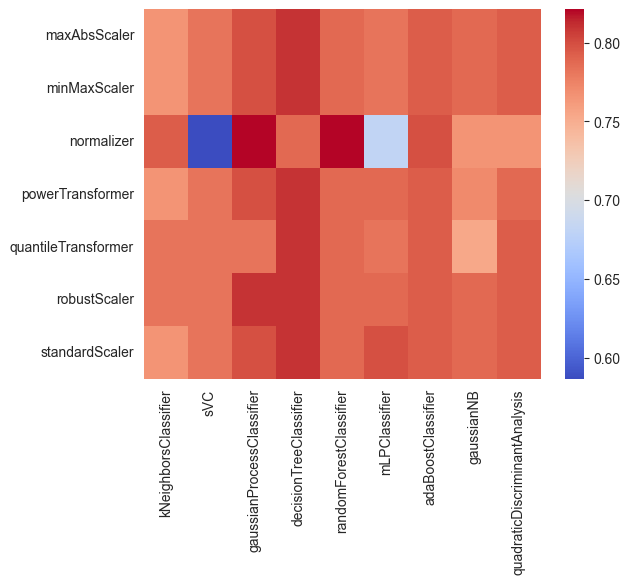

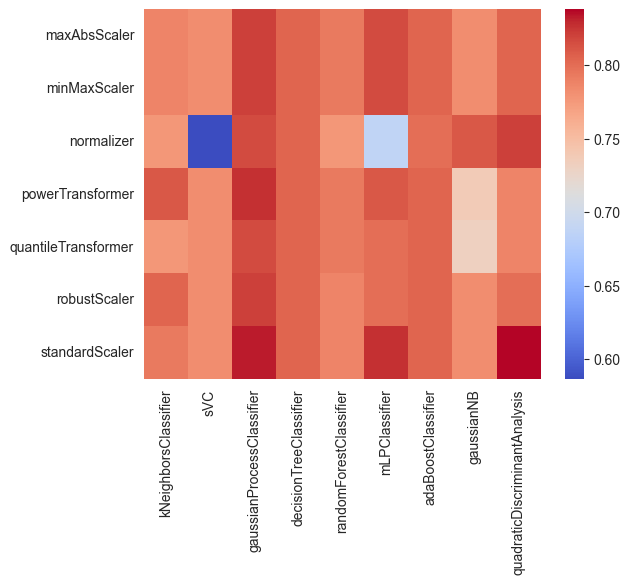

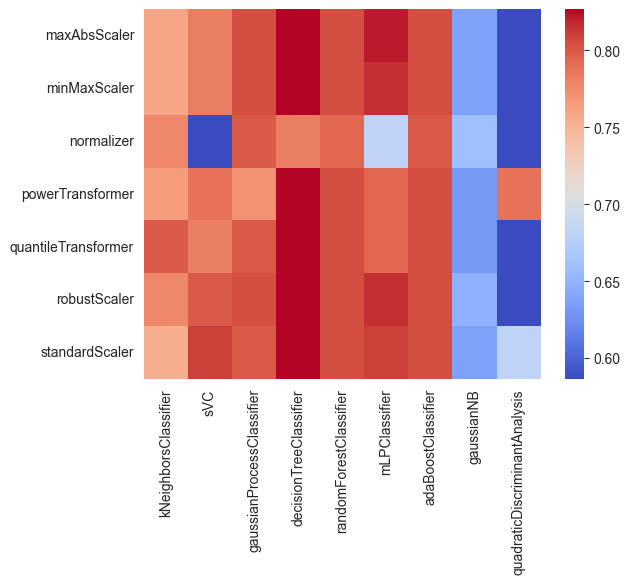

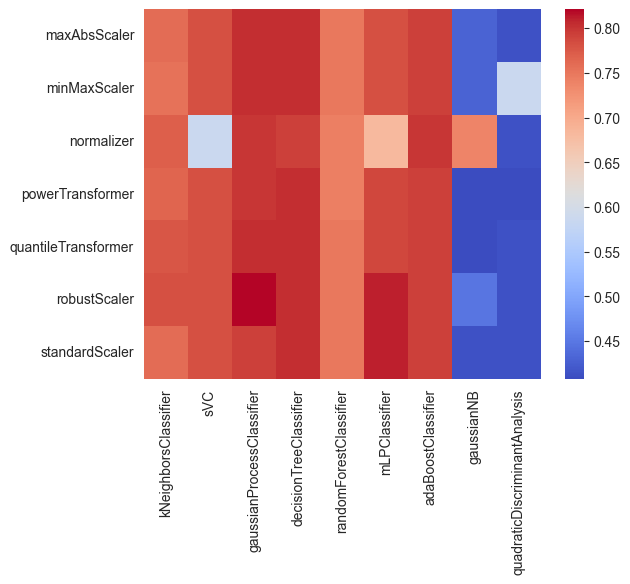

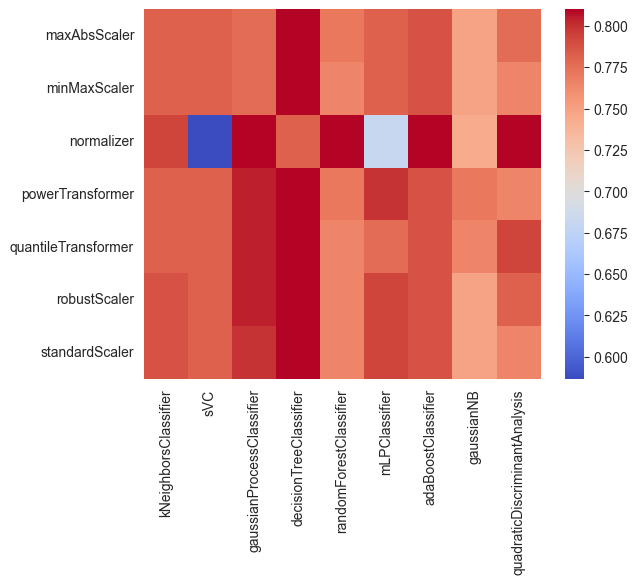

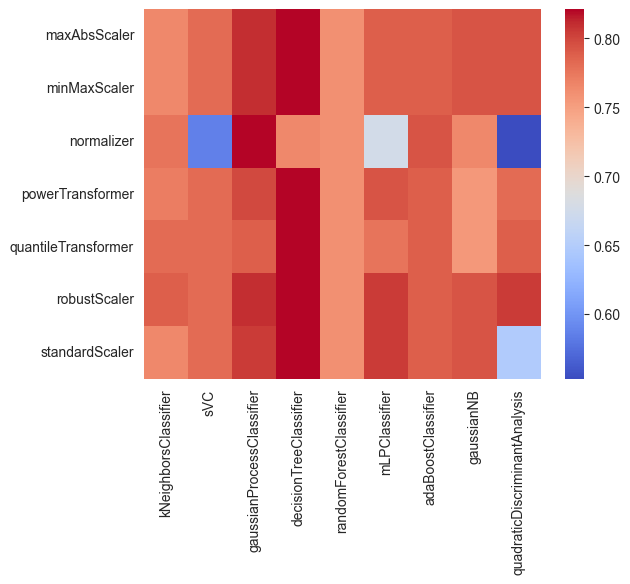

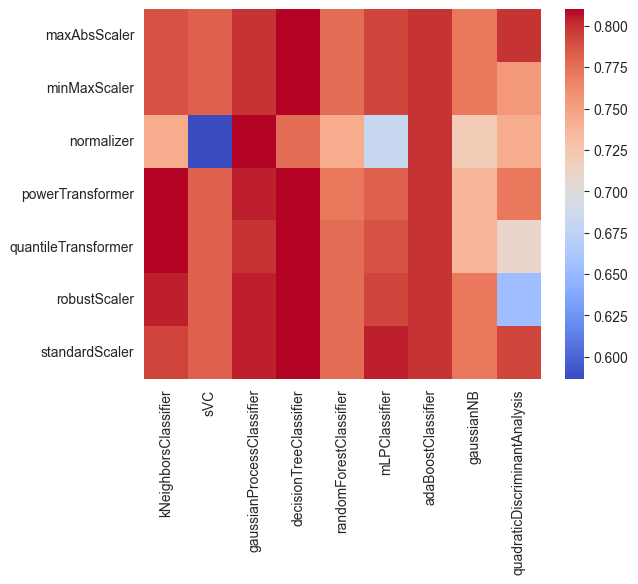

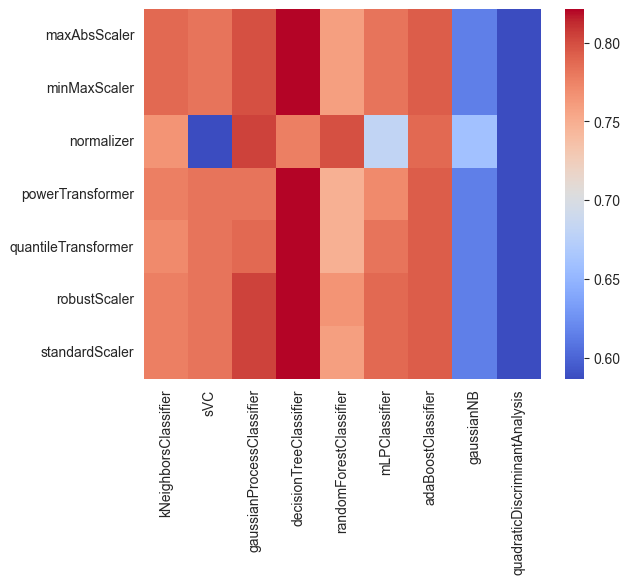

In [7]:
for score_df in score_dfs:
    heatmap = sns.heatmap(score_df, cmap="coolwarm")
    plt.show()

In [8]:
#[features_clear, features_pclass, features_title, features_cabin, features_embarked, features_relatives, features_age_g, features_fare_g]
best_features_for_tree = [f for f in features 
                         if 'Pclass' not in f ]
best_features_for_tree.remove('Age')
best_features_for_tree.remove('Fare')
best_features_for_tree.remove('SibSp')
best_features_for_tree.remove('Parch')
X_train, X_test, y_train, y_test = train_test_split(df[best_features_for_tree], df['Survived'], test_size=0.2, random_state=42)

In [9]:
for s in scalers:
    s.fit(X_train)
    train_data = s.transform(X_train)
    decisionTreeClassifier.fit(train_data, y_train)
    test_data = s.transform(X_test)
    accuracy = decisionTreeClassifier.score(test_data, y_test)
    scaler_name = [name for name, value in globals().items() if value is s]
    print(scaler_name[0], ": Accuracy:", accuracy)

maxAbsScaler : Accuracy: 0.8268156424581006
minMaxScaler : Accuracy: 0.8268156424581006
normalizer : Accuracy: 0.8324022346368715
powerTransformer : Accuracy: 0.8268156424581006
quantileTransformer : Accuracy: 0.8268156424581006
robustScaler : Accuracy: 0.8268156424581006
standardScaler : Accuracy: 0.8268156424581006


## GridSearching

## DecisionTreeClassifier

In [13]:
grid_scaler = Normalizer()
train_data = grid_scaler.transform(X_train)
test_data = grid_scaler.transform(X_test)

param_grid = {'criterion': ["gini",
                            "entropy",
                            "log_loss"],
              'splitter': ["best"],
              "max_depth": [None,
                            2,
                            3,
                            10],
              'min_samples_split': [None,
                                    5,
                                    25,
                                    45],
              "min_samples_leaf": [2,
                                   5,
                                   10,
                                   15],
              "min_weight_fraction_leaf": [0.0,
                                           50.0],
              "max_features": [None],
              "random_state": [None],
              "max_leaf_nodes": [None,
                                 40],
              "min_impurity_decrease": [0.0,
                                        50.0],
              "class_weight": [None],
              "ccp_alpha": [0.0,
                            50.0],
              "monotonic_cst": [None]
              }  

grid = GridSearchCV(estimator=DecisionTreeClassifier(), 
                    param_grid=param_grid,
                    refit=True,
                    scoring="accuracy",
                    cv=5,
                    verbose=3,
                    n_jobs=1)
grid.fit(train_data, y_train)

Fitting 5 folds for each of 3072 candidates, totalling 15360 fits
[CV 1/5] END ccp_alpha=0.0, class_weight=None, criterion=gini, max_depth=None, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=None, min_weight_fraction_leaf=0.0, monotonic_cst=None, random_state=None, splitter=best;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.0, class_weight=None, criterion=gini, max_depth=None, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=None, min_weight_fraction_leaf=0.0, monotonic_cst=None, random_state=None, splitter=best;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.0, class_weight=None, criterion=gini, max_depth=None, max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=2, min_samples_split=None, min_weight_fraction_leaf=0.0, monotonic_cst=None, random_state=None, splitter=best;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'ccp_alpha': [0.0, 50.0], 'class_weight': [None],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 2, 3, 10], 'max_features': [None],
                         'max_leaf_nodes': [None, 40],
                         'min_impurity_decrease': [0.0, 50.0],
                         'min_samples_leaf': [2, 5, 10, 15],
                         'min_samples_split': [None, 5, 25, 45],
                         'min_weight_fraction_leaf': [0.0, 50.0],
                         'monotonic_cst': [None], 'random_state': [None],
                         'splitter': ['best']},
             scoring='accuracy', verbose=3)

{'ccp_alpha': 50.0, 'class_weight': None, 'criterion': 'log_loss', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': 40, 'min_impurity_decrease': 50.0, 'min_samples_leaf': 15, 'min_samples_split': 45, 'min_weight_fraction_leaf': 0.5, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
Train accuracy: 0.6235955056179775
Test accuracy: 0.5865921787709497


              precision    recall  f1-score   support

         0.0       0.59      1.00      0.74       105
         1.0       0.00      0.00      0.00        74

    accuracy                           0.59       179
   macro avg       0.29      0.50      0.37       179
weighted avg       0.34      0.59      0.43       179


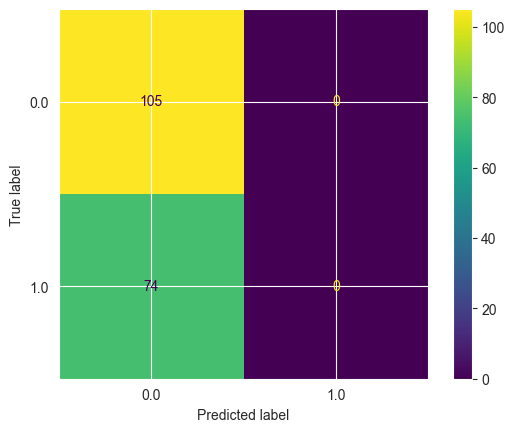

In [14]:
param_grid = {'criterion': ["gini",
                            "entropy",
                            "log_loss"],
              'splitter': ["best"],
              "max_depth": [None,
                            2,
                            3,
                            10],
              'min_samples_split': [5,
                                    25,
                                    45],
              "min_samples_leaf": [2,
                                   5,
                                   10,
                                   15],
              "min_weight_fraction_leaf": [0.0,
                                           0.2,
                                           0.5],
              "max_features": [None],
              "random_state": [None],
              "max_leaf_nodes": [None,
                                 40],
              "min_impurity_decrease": [0.0,
                                        50.0],
              "class_weight": [None],
              "ccp_alpha": [0.0,
                            50.0],
              "monotonic_cst": [None]
              }

param_grid_list = list(ParameterGrid(param_grid))

max_accuracy = 0
max_model = DecisionTreeClassifier
train_accuracy = 0.
test_output = list
for params in param_grid_list:
    model = DecisionTreeClassifier(
        criterion=params['criterion'],
        splitter=params['splitter'],
        max_depth=params['max_depth'],
        min_samples_split=params['min_samples_split'],
        min_samples_leaf=params['min_samples_leaf'],
        min_weight_fraction_leaf=params['min_weight_fraction_leaf'],
        max_features=params['max_features'],
        random_state=params['random_state'],
        max_leaf_nodes=params['max_leaf_nodes'],
        min_impurity_decrease=params['min_impurity_decrease'],
        class_weight=params['class_weight'],
        ccp_alpha=params['ccp_alpha'],
        monotonic_cst=params['monotonic_cst']
    )
    model.fit(train_data, y_train)
    test_output = model.predict(test_data)
    model_accuracy = accuracy_score(y_test, test_output)
    
    if max_accuracy < model_accuracy:
        max_model = model
        train_accuracy = accuracy_score(y_train, model.predict(train_data))
        
        
print(model.get_params())
print("Train accuracy:", train_accuracy)
print("Test accuracy:", model_accuracy)
display(ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, test_output),
                               display_labels=grid.classes_).plot())
print(classification_report(y_test, test_output))

Rank param_criterion param_splitter param_max_depth  \
130      1            gini           best               2   
132      1            gini           best               2   
138      1            gini           best               2   
146      1            gini           best               2   
196      1            gini           best               2   
198      1            gini           best               2   
202      1            gini           best               2   
204      1            gini           best               2   
212      1            gini           best               2   
268      1            gini           best               3   
270      1            gini           best               3   
274      1            gini           best               3   
278      1            gini           best               3   
334      1            gini           best               3   
342      1            gini           best               3   
642      1         entropy           best               2   
644      1         entropy           best               2   
646      1         entropy           best               2   
652      1         entropy           best               2   
662      1         entropy           best               2   
706      1         entropy           best               2   
770      1         entropy           best               3   
774      1         entropy           best               3   
778      1         entropy           best               3   
780      1         entropy           best               3   
788      1         entropy           best               3   
790      1         entropy           best               3   
836      1         entropy           best               3   
838      1         entropy           best               3   
842      1         entropy           best               3   
850      1         entropy           best               3   
852      1         entropy           best               3   
854      1         entropy           best               3   
1158     1        log_loss           best               2   
1162     1        log_loss           best               2   
1220     1        log_loss           best               2   
1222     1        log_loss           best               2   
1234     1        log_loss           best               2   
1238     1        log_loss           best               2   
1290     1        log_loss           best               3   
1292     1        log_loss           best               3   
1300     1        log_loss           best               3   
1302     1        log_loss           best               3   
1346     1        log_loss           best               3   
1350     1        log_loss           best               3   
262     46            gini           best               3   
322     46            gini           best               3   
324     46            gini           best               3   
134     49            gini           best               2   
140     49            gini           best               2   
142     49            gini           best               2   
148     49            gini           best               2   
150     49            gini           best               2   
194     49            gini           best               2   
206     49            gini           best               2   
210     49            gini           best               2   
214     49            gini           best               2   
266     49            gini           best               3   
276     49            gini           best               3   
330     49            gini           best               3   
332     49            gini           best               3   
338     49            gini           best               3   
340     49            gini           best               3   
650     49         entropy           best               2   
654     49         entropy           best

''

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
Train accuracy: 0.8300561797752809
Test accuracy: 0.8212290502793296
Test accuracy direct: 0.8212290502793296


              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       105
         1.0       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


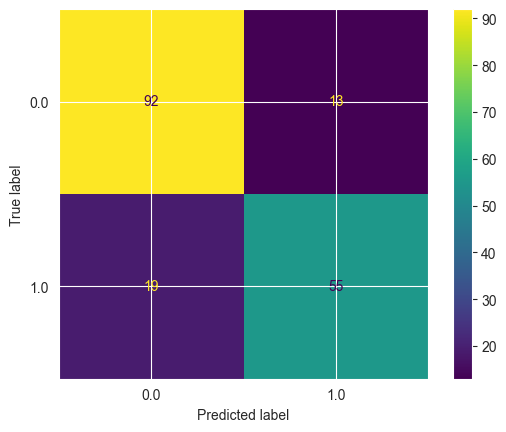

In [15]:
output = grid.predict(test_data)

cv_results_df = grid.cv_results_
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(pd.DataFrame({"Rank": cv_results_df["rank_test_score"],
                          "param_criterion": cv_results_df["param_criterion"],
                          "param_splitter": cv_results_df["param_splitter"],
                          "param_max_depth": cv_results_df["param_max_depth"],
                          "param_min_samples_split": cv_results_df["param_min_samples_split"],
                          "param_min_samples_leaf": cv_results_df["param_min_samples_leaf"],
                          "param_min_weight_fraction_leaf": cv_results_df["param_min_weight_fraction_leaf"],
                          "param_max_features": cv_results_df["param_max_features"],
                          "param_random_state": cv_results_df["param_max_features"],
                          "param_max_leaf_nodes": cv_results_df["param_max_leaf_nodes"],
                          "param_min_impurity_decrease": cv_results_df["param_min_impurity_decrease"],
                          "param_class_weight": cv_results_df["param_class_weight"],
                          "param_ccp_alpha": cv_results_df["param_ccp_alpha"],
                          "param_monotonic_cst": cv_results_df["param_monotonic_cst"],
                          "mean_test_score": cv_results_df["mean_test_score"]}).nlargest(100, "mean_test_score"))

display("")
train_accuracy = accuracy_score(y_train, grid.predict(train_data))
#print(grid.score(test_data_modified, pd.DataFrame({"Output": output})))
test_accuracy = accuracy_score(y_test, output)
test_accuracy_direct = grid.score(test_data, y_test)

print(grid.best_params_)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)
print("Test accuracy direct:", test_accuracy_direct)
display(ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, output),
                               display_labels=grid.classes_).plot())
print(classification_report(y_test, output))

## KNN

In [26]:
param_grid = {'n_neighbors': [2,
                              3,
                              4
                              ],
              'weights': ["uniform",
                          "distance"],
              "algorithm": ["ball_tree",
                            "kd_tree",
                            "brute",
                            "auto"],
              # int def: 30
              'leaf_size': [1,
                            5],
              "metric": ["minkowski",
                         "cityblock",
                         "cosine",
                         "euclidean",
                         "sqeuclidean",
                         "haversine",
                         "manhattan",
                         "nan_euclidean",
                         "l1",
                         "l2"],
              # int def: None
              "n_jobs": [4],
              }  

grid = GridSearchCV(estimator=KNeighborsClassifier(), 
                    param_grid=param_grid,
                    refit=True,
                    scoring="accuracy",
                    cv=8,
                    verbose=3,
                    n_jobs=1)
grid.fit(train_data, y_train)

Fitting 8 folds for each of 480 candidates, totalling 3840 fits
[CV 1/8] END algorithm=ball_tree, leaf_size=1, metric=minkowski, n_jobs=4, n_neighbors=2, weights=uniform;, score=0.775 total time=   0.0s
[CV 2/8] END algorithm=ball_tree, leaf_size=1, metric=minkowski, n_jobs=4, n_neighbors=2, weights=uniform;, score=0.719 total time=   0.0s
[CV 3/8] END algorithm=ball_tree, leaf_size=1, metric=minkowski, n_jobs=4, n_neighbors=2, weights=uniform;, score=0.787 total time=   0.0s
[CV 4/8] END algorithm=ball_tree, leaf_size=1, metric=minkowski, n_jobs=4, n_neighbors=2, weights=uniform;, score=0.764 total time=   0.0s
[CV 5/8] END algorithm=ball_tree, leaf_size=1, metric=minkowski, n_jobs=4, n_neighbors=2, weights=uniform;, score=0.663 total time=   0.0s
[CV 6/8] END algorithm=ball_tree, leaf_size=1, metric=minkowski, n_jobs=4, n_neighbors=2, weights=uniform;, score=0.753 total time=   0.0s
[CV 7/8] END algorithm=ball_tree, leaf_size=1, metric=minkowski, n_jobs=4, n_neighbors=2, weights=unif

GridSearchCV(cv=8, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
                         'leaf_size': [1, 5],
                         'metric': ['minkowski', 'cityblock', 'cosine',
                                    'euclidean', 'sqeuclidean', 'haversine',
                                    'manhattan', 'nan_euclidean', 'l1', 'l2'],
                         'n_jobs': [4], 'n_neighbors': [2, 3, 4],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

Rank param_n_neighbors param_weights param_leaf_size   param_metric  \
10      1                 4     ball_tree               1      cityblock   
40      1                 4     ball_tree               1      manhattan   
52      1                 4     ball_tree               1             l1   
70      4                 4     ball_tree               5      cityblock   
100     4                 4     ball_tree               5      manhattan   
112     4                 4     ball_tree               5             l1   
245     7                 4         brute               1      minkowski   
263     7                 4         brute               1      euclidean   
269     7                 4         brute               1    sqeuclidean   
305     7                 4         brute               5      minkowski   
323     7                 4         brute               5      euclidean   
329     7                 4         brute               5    sqeuclidean   
365     7                 4          auto               1      minkowski   
383     7                 4          auto               1      euclidean   
389     7                 4          auto               1    sqeuclidean   
425     7                 4          auto               5      minkowski   
443     7                 4          auto               5      euclidean   
449     7                 4          auto               5    sqeuclidean   
5      19                 4     ball_tree               1      minkowski   
11     19                 4     ball_tree               1      cityblock   
23     19                 4     ball_tree               1      euclidean   
41     19                 4     ball_tree               1      manhattan   
53     19                 4     ball_tree               1             l1   
59     19                 4     ball_tree               1             l2   
65     25                 4     ball_tree               5      minkowski   
83     25                 4     ball_tree               5      euclidean   
119    25                 4     ball_tree               5             l2   
71     28                 4     ball_tree               5      cityblock   
101    28                 4     ball_tree               5      manhattan   
113    28                 4     ball_tree               5             l1   
250    28                 4         brute               1      cityblock   
280    28                 4         brute               1      manhattan   
292    28                 4         brute               1             l1   
310    28                 4         brute               5      cityblock   
340    28                 4         brute               5      manhattan   
352    28                 4         brute               5             l1   
370    28                 4          auto               1      cityblock   
400    28                 4          auto               1      manhattan   
412    28                 4          auto               1             l1   
430    28                 4          auto               5      cityblock   
460    28                 4          auto               5      manhattan   
472    28                 4          auto               5             l1   
257    43                 4         brute               1         cosine   
287    43                 4         brute               1  nan_euclidean   
317    43                 4         brute               5         cosine   
347    43                 4         brute               5  nan_euclidean   
377    43                 4          auto               1         cosine   
407    43                 4          auto               1  nan_euclidean   
437    43                 4          auto               5         cosine   
467    43                 4          auto               5  nan_euclidean   
130    51                 4       kd_tree               1      cityblock   
160    51                 4       kd_tree            

''

{'algorithm': 'ball_tree', 'leaf_size': 1, 'metric': 'cityblock', 'n_jobs': 4, 'n_neighbors': 4, 'weights': 'uniform'}
Train accuracy: 0.8356741573033708
Test accuracy: 0.776536312849162


              precision    recall  f1-score   support

         0.0       0.77      0.88      0.82       105
         1.0       0.78      0.64      0.70        74

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.76       179
weighted avg       0.78      0.78      0.77       179


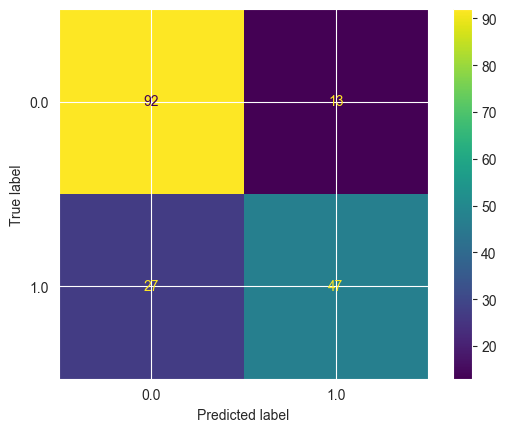

In [27]:
output = grid.predict(test_data)

cv_results_df = grid.cv_results_
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(pd.DataFrame({"Rank": cv_results_df["rank_test_score"],
                          "param_n_neighbors": cv_results_df["param_n_neighbors"],
                          "param_weights": cv_results_df["param_algorithm"],
                          "param_leaf_size": cv_results_df["param_leaf_size"],
                          "param_metric": cv_results_df["param_metric"],
                          "mean_test_score": cv_results_df["mean_test_score"]}).nlargest(100, "mean_test_score"))

display("")
train_accuracy = accuracy_score(y_train, grid.predict(train_data))
#print(grid.score(test_data_modified, pd.DataFrame({"Output": output})))
test_accuracy = accuracy_score(y_test, output)

print(grid.best_params_)

print("Train accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)
display(ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, output),
                               display_labels=grid.classes_).plot())
print(classification_report(y_test, output))